# Proyek Analisis Data: Bike Sharing
- **Nama:** Istiana Salsabila
- **Email:** tiaak002@gmail.com
- **ID Dicoding:** tiak_ds


## Menentukan Pertanyaan Bisnis

- Pada musim apa jasa bike sharing paling banyak dan paling sedikit digunakan oleh pelanggan?
- Pada jam berapa terjadi peningkatan pengguna secara signifikan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [4]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [5]:
hours_df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Bike Sharing/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset sudah berhasil diload ke dalam dataframe, hours_df



### Assessing Data

In [6]:
#hours_df assesing
hours_df.info()
hours_df.isna().sum() #tidak ada data yang bernilai null
print("Jumlah duplikasi: ", hours_df.duplicated().sum()) #tidak ditemukan duplikasi data
hours_df.describe() # tidak ditemukan anomali

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataframe mengalami kekeliruan yang sama pada kolom dteday, yang seharusnya bertipe data **datetime** bukan **object**
- Tidak ditemukan data null, duplikasi, dan anomali dalam dataframe tersebut

### Cleaning Data

In [7]:
#mengganti tipe data dteday dari hours_df
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

*   Tipe data kolom **dteday** telah diubah menjadi datetime pada datarame



## Exploratory Data Analysis (EDA)

**1. Melihat trend pengguna berdasarkan musim, dibagi menjadi pengguna casula dan registered**

In [8]:
cust_seasons_df = hours_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
    }).reset_index()

cust_seasons_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
    })

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


**Menampilkan suhu rata-rata tiap musim**

In [9]:
#Suhu rata-rata setiap musim
cust_temp_df = hours_df.groupby(by="season").agg({
    "temp": "mean"
    }).reset_index()

#menampilkan suhu asli
cust_temp_df['temp'] = cust_temp_df['temp']*41

print(cust_temp_df)


   season       temp
0       1  12.265012
1       2  22.331191
2       3  28.962816
3       4  17.348658


**2. Trend jam yang dimana terjadi peninggkatan pengguan secara signifikan**

In [10]:
cust_hour_df = hours_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
    }).reset_index()

cust_hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
    })

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa jasa bike sharing paling banyak dan paling sedikit digunakan oleh pelanggan?

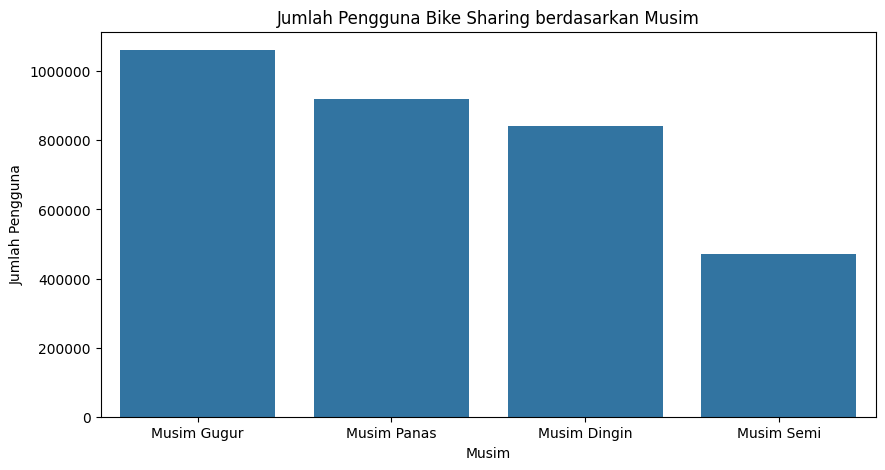

In [11]:
#mengganti kode musim, menjadi value sebenarnya
musim_map={1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
cust_seasons_df['season'] = cust_seasons_df['season'].map(musim_map)

cust_seasons_df = cust_seasons_df.sort_values(by="cnt", ascending=False)


plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=cust_seasons_df
)

plt.title('Jumlah Pengguna Bike Sharing berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

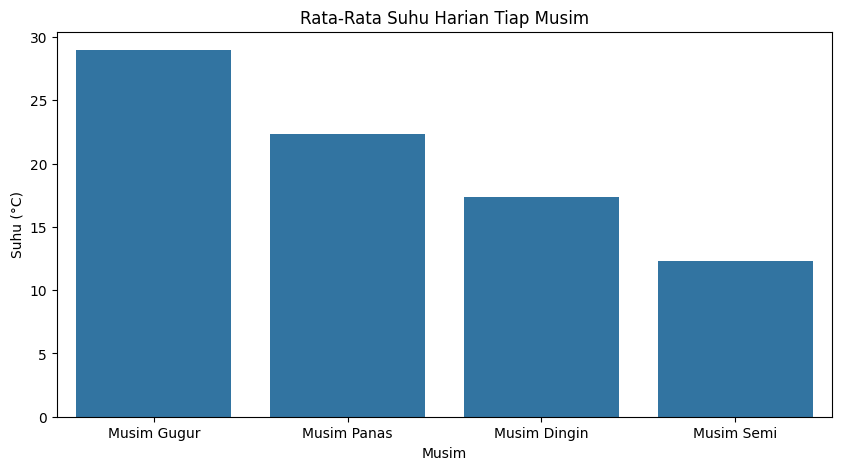

In [12]:
#Suhu rata-rata tiap musim
musim_map={1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
cust_temp_df['season'] = cust_temp_df['season'].map(musim_map)

cust_temp_df = cust_temp_df.sort_values(by="temp", ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="temp",
    x="season",
    data=cust_temp_df
)

plt.title('Rata-Rata Suhu Harian Tiap Musim')
plt.xlabel('Musim')
plt.ylabel('Suhu (°C)')
plt.show()

### Pertanyaan 2: Pada jam berapa terjadi peningkatan pengguna secara signifikan?

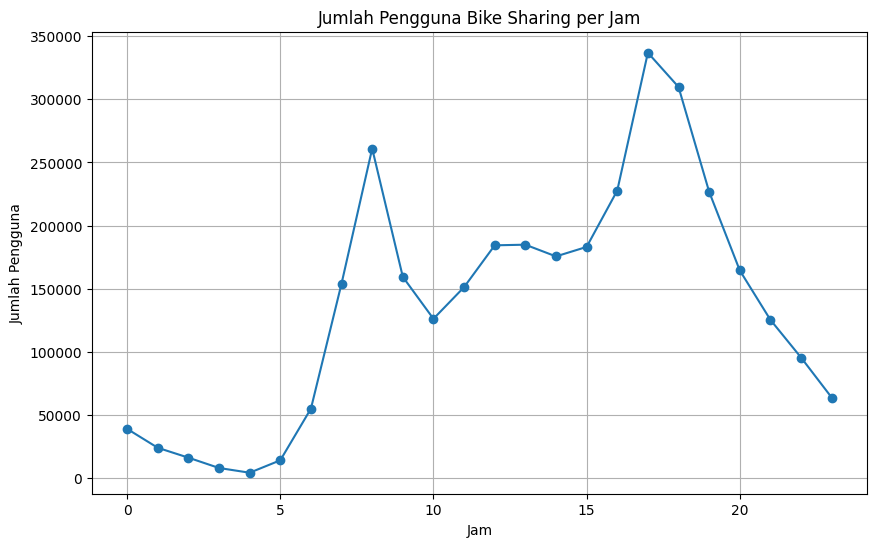

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(cust_hour_df.index, cust_hour_df['cnt'], marker='o')

plt.title('Jumlah Pengguna Bike Sharing per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

**Insight:**
- Musim gugur menjadi musim dimana jasa bike sharing mendapat paling banyak pengguna, sedangkan untuk jumlah pengguna paling sedikit terjadi pada musim semi.
- Peningkatang pengguna paling signifikan terjadi pada 2 waktu, yaitu pada 08:00 dan 17:00.

## Conclusion

- Musim gugur menjadi musim dimana jasa bike sharing mendapat paling banyak pengguna, sedangkan untuk jumlah pengguna paling sedikit terjadi pada musim semi. Hal ini dapat terjadi karena pada musim semi, suhu rata-rata tiap harinya lebi rendah dari tiga musim lainnya, bahkan lebih rendah dari musim dingin.
- Terkait dengan jumlah pengguna pada musim-musim tertentu, saat terjadi puncak jumlah pengguna pada musim gugur, agar menarik lebih banyak pengguna dapat diadakan paket berlangganan bulanan yang relatif lebih murah. Sedangkan untuk menangani jumlah pengguna paling sedikit pada musim semi, dapat disediakan promo berupa fasilitas pemanas tubuh ynag dapat digunakan dalam berkendara menggunakan sepeda atau voucher free hot drink bagi pengguna.

- Peningkatang pengguna paling signifikan terjadi pada 2 waktu, yaitu pada 08:00 dan 17:00. yang dimana pada jam tersebut merupakan waktu orang-orang berangkat dan pulang kerja.
- untuk peningkatan pengguna saat jam-jam sibuk, tentu perlu diantisipasi dengan menambah pengalokasian armada terutama di sekitar daerah perkantoran dan penempatan stasiun bike sharing yang strategis, seperti dekat dengan transportasi umum lain, agar pengguna dapat lebih mudah jika ingin melakukan perjalanan yg memerlukan beberapa moda transportasi.

**Data for Dashboard**

In [ ]:
hours_df.to_csv('hours_df.csv', index=False)